In [ ]:
from keras.datasets import mnist
import matplotlib 
import matplotlib.pyplot as plt
import random
import keras
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential,Input,Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


In [ ]:
# def show_image(data, lables, number_of_images):
#     #figure, axes = plt.subplots(nrows=2, ncols=2)
#     for i in range(number_of_images):
#         #plt.subplot(330 + 1 + i)
#         plt.subplot(2,number_of_images,i+1)
#         plt.imshow(data[i], cmap=plt.get_cmap('gray'))
#     plt.show()
#     #figure.tight_layout()
#     for i in range(number_of_images):
#         print(lables[i]," ")
def show_image(data, labels, number_of_images):
    for i in range(number_of_images):
        plt.subplot(330 + 1 + i)
        plt.imshow(data[i], cmap=plt.get_cmap('gray'))
    plt.show()
    for i in range(number_of_images):
        print(labels[i])

In [ ]:
def getData():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print('X_train: ' + str(x_train.shape))
    print('Y_train: ' + str(y_train.shape))
    print('X_test:  ' + str(x_test.shape))
    print('Y_test:  ' + str(y_test.shape))
    print("-----------------------------------------------")
    show_image(x_train, y_train, 6)
    return x_train, y_train, x_test, y_test

In [ ]:
def shuffle(data, labels):
    index = list(range(1, len(data)))
    random.shuffle(index)
    for i in range(len(index)):
        data[i], labels[i] = data[index[i]], labels[index[i]]
    return data, labels

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
-----------------------------------------------


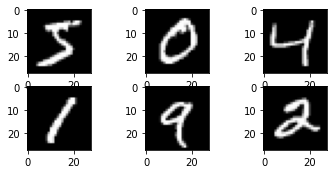

5
0
4
1
9
2


In [ ]:
x_train, y_train, x_test, y_test = getData()


# 0-	Include shuffling in your data (this is usually by setting a parameter to true)

In [ ]:
# x_train, y_train = shuffle(x_train,y_train)
# show_image(x_train, y_train, 6)

In [ ]:
# x_test, y_test = shuffle(x_train,y_train)
# show_image(x_test, y_test, 6)

In [ ]:
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
x_train,x_valid,y_train,y_valid = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=13)

In [ ]:
first_model = Sequential()
first_model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1), padding='same'))
first_model.add(MaxPooling2D((2, 2), padding='same'))
first_model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
first_model.add(MaxPooling2D((2, 2), padding='same'))
first_model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
first_model.add(MaxPooling2D((2, 2), padding='same'))
first_model.add(Dropout(0.6))
first_model.add(Flatten())
first_model.add(Dense(128, activation='relu'))
first_model.add(Dense(10, activation='softmax'))


In [ ]:
batch_size = 250
epochs = 30
num_classes = 10
first_model.compile(loss=keras.losses.binary_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])
first_model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

In [ ]:
first_model_train = first_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                                    validation_data=(x_valid, y_valid))


Epoch 1/30
192/192 [==============================] - 34s 10ms/step - loss: 0.7587 - accuracy: 0.5147 - val_loss: 0.0318 - val_accuracy: 0.9586
Epoch 2/30
192/192 [==============================] - 2s 8ms/step - loss: 0.0494 - accuracy: 0.9319 - val_loss: 0.0199 - val_accuracy: 0.9737
Epoch 3/30
192/192 [==============================] - 2s 8ms/step - loss: 0.0319 - accuracy: 0.9549 - val_loss: 0.0140 - val_accuracy: 0.9808
Epoch 4/30
192/192 [==============================] - 2s 8ms/step - loss: 0.0248 - accuracy: 0.9649 - val_loss: 0.0119 - val_accuracy: 0.9836
Epoch 5/30
192/192 [==============================] - 2s 8ms/step - loss: 0.0198 - accuracy: 0.9728 - val_loss: 0.0102 - val_accuracy: 0.9852
Epoch 6/30
192/192 [==============================] - 2s 8ms/step - loss: 0.0173 - accuracy: 0.9764 - val_loss: 0.0097 - val_accuracy: 0.9859
Epoch 7/30
192/192 [==============================] - 2s 8ms/step - loss: 0.0155 - accuracy: 0.9773 - val_loss: 0.0092 - val_accuracy: 0.9871
Epoc

In [ ]:
first_model.evaluate(x_test, y_test_one_hot,batch_size=200, verbose=1)

50/50 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.9897


[0.0061249700374901295, 0.9897000193595886]